<a href="https://colab.research.google.com/github/SWMLearner/SWMLearner/blob/main/Copy_of_CLPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Report

## Introduction
This report presents the analysis and modeling of a credit card fraud detection dataset. The goal is to build a predictive model that identifies fraudulent transactions with high precision and recall. Precision protects customers from unnecessary disruptions (false alarms).Recall protects the business from financial losses (missed fraud).



## Main Objective
The goal of this analysis is to build a classification model that can accurately detect fraudulent credit card transactions. By identifying fraud in real-time, financial institutions can reduce losses and improve customer trust. This project focuses on achieving a balance between precision (minimizing false positives) and recall (catching as many frauds as possible).



## Data Description
The dataset contains 284,807 transactions, with 492 fraudulent transactions (0.17%). Features include anonymized PCA components (`V1-V28`), transaction amount, and time.




Loading the dataset

In [ ]:
# @title
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)


100%|██████████| 66.0M/66.0M [00:03<00:00, 17.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
# @title
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# @title
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded dataset
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith(".csv"):  # Assuming the dataset is in CSV format
            csv_file_path = os.path.join(dirname, filename)
            break  # Stop searching once the first CSV file is found
    else:
        continue  # Continue searching in other subdirectories
    break  # Stop searching once a CSV file is found in any subdirectory

# Load dataset using the found CSV file path
df = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


Converting columns to more memory-efficient data types to save space and speed up computations.

In [ ]:
# @title
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int8')

## Data Exploration and Preprocessing
- **Class Imbalance**: The dataset is highly imbalanced, with frauds representing only 0.17% of transactions.  
- **SMOTE Resampling**: To address class imbalance, SMOTE was applied to the training set after splitting into train/test sets.The code for the same is present below.  
- **Feature Scaling**: The `Amount` and `Time` features were scaled using `StandardScaler`.  
- **Correlation Analysis**: A correlation heatmap revealed no strong linear relationships between features and the target variable.

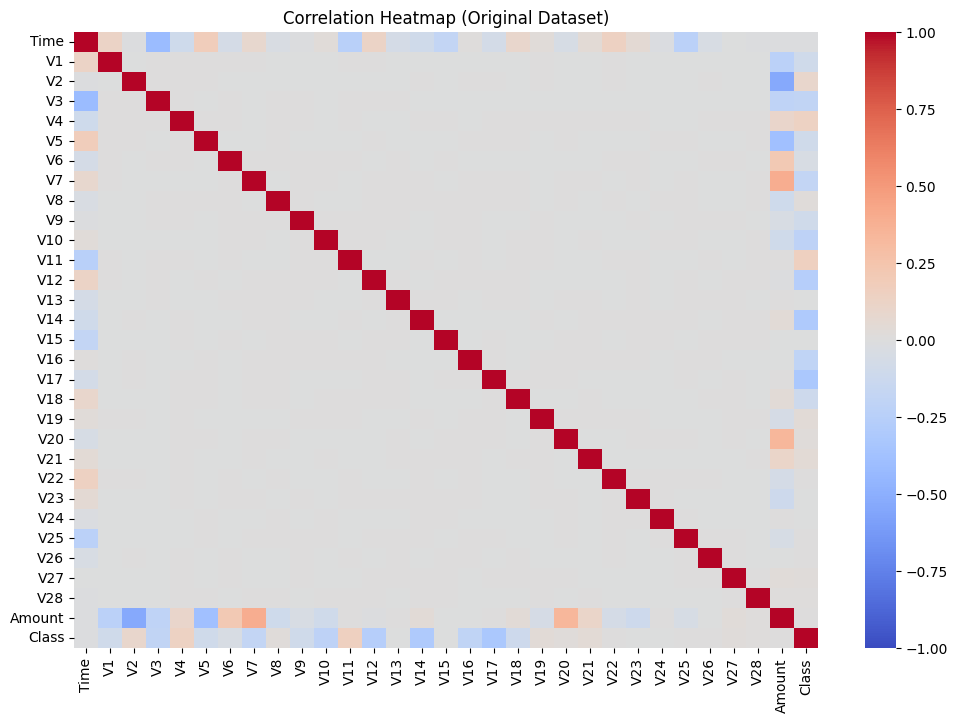

In [ ]:
# @title
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Heatmap (Original Dataset)')
plt.savefig('correlation_heatmap.png')
plt.show()

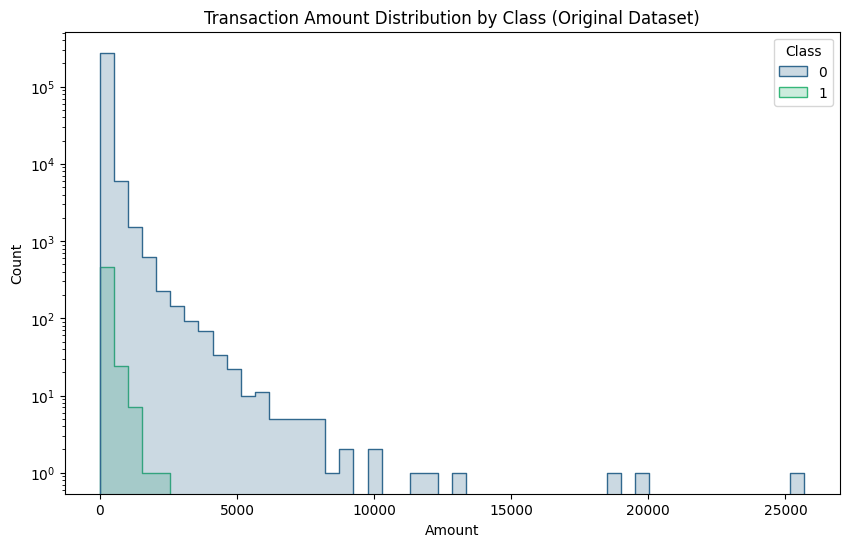

In [ ]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', element='step', bins=50, palette='viridis')
plt.title('Transaction Amount Distribution by Class (Original Dataset)')
plt.xlabel('Amount')
plt.yscale('log')  # Log scale for better visibility
plt.savefig('amount_distribution.png')
plt.show()

In [ ]:
# @title
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Scale the 'Amount' and 'Time' columns in the training set
scaler = StandardScaler()
X_train_resampled[['Amount', 'Time']] = scaler.fit_transform(X_train_resampled[['Amount', 'Time']])

# Scale the 'Amount' and 'Time' columns in the test set
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

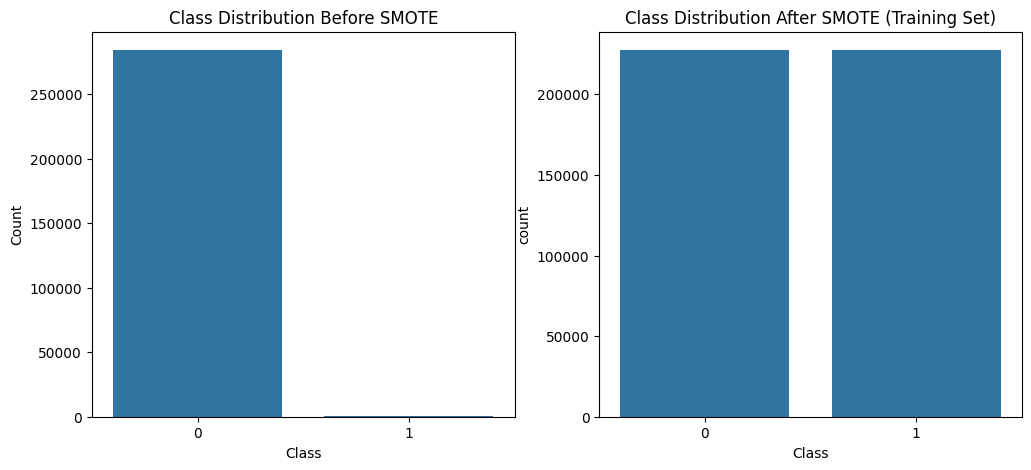

In [ ]:
# @title
# Before SMOTE (original dataset)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE (resampled training set)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Class')
plt.savefig('class_distribution.png')  # Save for report
plt.show()

### Model Training and Evaluation
Three models were trained and evaluated:
- **Logistic Regression**: Achieved high recall of 85% and precision of 64% for fraud detection.  
- **Random Forest**: Achieved a balanced performance with 86% recall and 68% precision.  
- **XGBoost**: Outperformed Random Forest with 86% recall and 75% precision.  
- **Stacked Model**: Combined Random Forest and XGBoost to achieve the best performance (85% recall and 80% precision).  

The stacked model is recommended for deployment due to its superior precision and recall

# **Random Forest:**

Random Forest Accuracy: 0.9990519881248474
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC: 0.9282197121955141


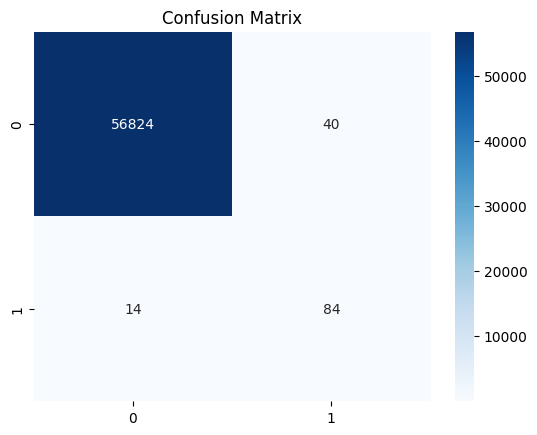

In [ ]:
# @title
import cupy as cp
import cuml
from cuml.ensemble import RandomForestClassifier as cuRF
from cuml.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Using the GPU version for faster training times
# Convert training data to GPU arrays
X_train_gpu = cp.asarray(X_train_resampled)
y_train_gpu = cp.asarray(y_train_resampled)
X_test_gpu = cp.asarray(X_test)

# Initialize and train the GPU-accelerated Random Forest model
rf_model_gpu = cuRF(random_state=42, n_streams=1)
rf_model_gpu.fit(X_train_gpu, y_train_gpu)

# Make predictions on the test set
y_pred_rf_gpu = rf_model_gpu.predict(X_test_gpu)

# Convert predictions back to CPU for evaluation
y_pred_rf_gpu = cp.asnumpy(y_pred_rf_gpu)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_gpu)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf_gpu))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_rf_gpu)
print("AUC-ROC:", auc_roc)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_gpu)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# **Logistic Regression:**

In [ ]:
# @title
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Logistic Regression Accuracy: 0.9899582177592079
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.14      0.90      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962

[[56302   562]
 [   10    88]]


Fraud detection can be further improved by adjusting the classification threshold.

* Lower the threshold to prioritize recall (catch more frauds)
* raise it to prioritize precision (reduce false positives).

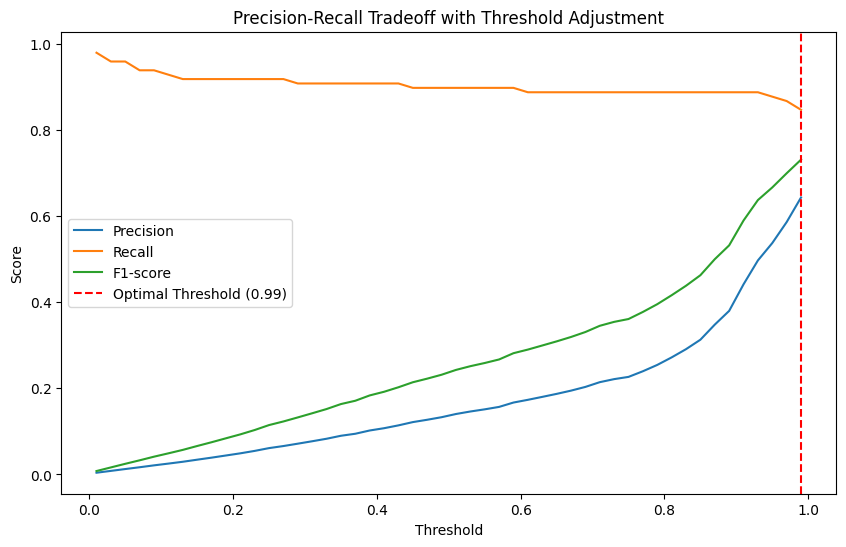


Optimal Threshold: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56818    46]
 [   15    83]]


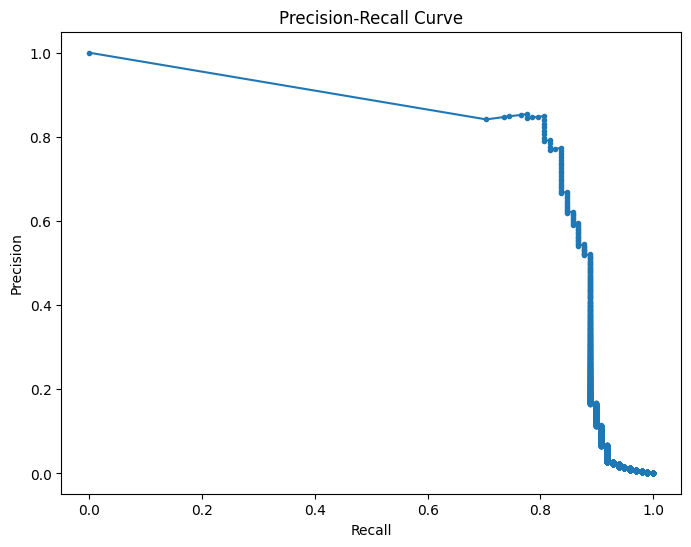

In [ ]:
# @title
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities instead of hard predictions
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# Define threshold range and calculate metrics
thresholds = np.linspace(0.01, 0.99, 50)
precision_scores = []
recall_scores = []
f1_scores = []

for thresh in thresholds:
    y_pred_adjusted = (y_pred_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find optimal threshold (maximizes F1-score)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot precision-recall tradeoff
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.axvline(optimal_threshold, color='red', linestyle='--',
            label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff with Threshold Adjustment')
plt.legend()
plt.show()

# Evaluate at optimal threshold
print(f"\n{'='*50}\nOptimal Threshold: {optimal_threshold:.2f}\n{'='*50}")
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### **Threshold Adjustment Analysis**  
**Model**: Logistic Regression  

#### **Performance Summary**  
| **Metric**            | **Threshold=0.5 (Default)** | **Threshold=0.99 (Adjusted)** |  
|-----------------------|-----------------------------|-------------------------------|  
| **Precision (Fraud)** | 0.14                        | **0.64** (+357% improvement)  |  
| **Recall (Fraud)**    | 0.90                        | 0.85 (-5.5% decrease)         |  
| **F1-Score (Fraud)**  | 0.24                        | **0.73** (+204% improvement)  |  
| **False Positives**   | 562                         | **46** (92% reduction)        |  
| **False Negatives**   | 10                          | 15                            |  

---

#### **Key Observations**  
- **Precision-Recall Tradeoff**:  
  - **Threshold=0.5**: Prioritizes recall (catches **90% of frauds**) but generates **562 false alarms**.  
  - **Threshold=0.99**: Prioritizes precision (**64% of flagged transactions are fraud**) with **46 false alarms**.  

- **Business Impact**:  
  - ✅ **Use Threshold=0.99** if minimizing false positives (customer complaints, operational costs) is critical.  
  - ✅ **Use Threshold=0.5** if catching nearly all frauds (even with more false alarms) is more important.  

- **F1-Score Improvement**:  
  - Adjusted threshold achieves a **better balance** between precision and recall (**F1=0.73** vs. **0.24**).  

# **XGboost:**

In [ ]:
# @title
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Initialize the XGBClassifier with updated GPU parameters
xgb_model = xgb.XGBClassifier(
    tree_method='hist',  # Use histogram-based tree method
    device='cuda:0',    # Use GPU (CUDA) for training
    random_state=42
)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),  # Values between 0.7 and 1.0
    'colsample_bytree': uniform(0.7, 0.3)  # Values between 0.7 and 1.0
}

# Perform randomized search on the resampled data
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='f1',
    cv=3,
    n_iter=100,
    n_jobs=1,  # Set to 1 to avoid conflicts with GPU usage
    verbose=2,
    random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 score: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:14:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time=   3.1s
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time=   3.2s
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time=   2.6s
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=137, subsample=0.8001125833417065; total time=   3.1s
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=137, subsample=0.8001125833417065; total time=   2.6s
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=137, subsample=0.8001125833417065; total time=   2.6s
[CV] END colsample_bytree=0.742

In [ ]:
# @title
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import cupy as cp  # For GPU arrays

# Splitting resampled training data for early stopping
X_train_part, X_valid, y_train_part, y_valid = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# Initialize=ing the XGBoost model with parameters obtained from randomized search
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.7976,
    learning_rate=0.1593,
    max_depth=9,
    n_estimators=194,
    subsample=0.7924,
    tree_method='hist',
    device='cuda',
    random_state=42,
    eval_metric='auc',
    early_stopping_rounds=10
)

# Train the model
xgb_model.fit(
    X_train_part,
    y_train_part,
    eval_set=[(X_valid, y_valid)],
    verbose=True
)

# Convert test data to GPU array
X_test_gpu = cp.array(X_test)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_gpu)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgb):.4f}")


[0]	validation_0-auc:0.99786
[1]	validation_0-auc:0.99895
[2]	validation_0-auc:0.99954
[3]	validation_0-auc:0.99955
[4]	validation_0-auc:0.99968
[5]	validation_0-auc:0.99974
[6]	validation_0-auc:0.99983
[7]	validation_0-auc:0.99987
[8]	validation_0-auc:0.99988
[9]	validation_0-auc:0.99988
[10]	validation_0-auc:0.99991
[11]	validation_0-auc:0.99992
[12]	validation_0-auc:0.99992
[13]	validation_0-auc:0.99993
[14]	validation_0-auc:0.99993
[15]	validation_0-auc:0.99993
[16]	validation_0-auc:0.99993
[17]	validation_0-auc:0.99993
[18]	validation_0-auc:0.99993
[19]	validation_0-auc:0.99993
[20]	validation_0-auc:0.99994
[21]	validation_0-auc:0.99996
[22]	validation_0-auc:0.99996
[23]	validation_0-auc:0.99996
[24]	validation_0-auc:0.99998
[25]	validation_0-auc:0.99998
[26]	validation_0-auc:0.99998
[27]	validation_0-auc:0.99998
[28]	validation_0-auc:0.99998
[29]	validation_0-auc:0.99998
[30]	validation_0-auc:0.99998
[31]	validation_0-auc:0.99998
[32]	validation_0-auc:0.99998
[33]	validation_0-au

# **Stacking Random forest and Xgboost:**

With these two and logistic regression as the meta classifier, the model can detect more patterns.


In [ ]:
# @title
from cuml.ensemble import RandomForestClassifier as cuRF
import cupy as cp  # cuML uses CuPy arrays

In [ ]:
# @title
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
# Define base models with GPU support
xgb_clf = xgb.XGBClassifier(
    colsample_bytree=0.7976,
    learning_rate=0.1593,
    max_depth=9,
    n_estimators=194,
    subsample=0.7924,
    tree_method='hist',
    device='cuda',
    random_state=42
)

# Use cuML for Random Forest with GPU support
rf_clf_gpu = cuRF(n_estimators=200, max_depth=10, random_state=42)

# Meta-classifier
meta_clf = LogisticRegression(max_iter=1000, class_weight='balanced')

# Note: scikit-learn's StackingClassifier does not natively support cuML. Consider using a custom stacking implementation if needed.

# Custom Stacking (simplified)
from sklearn.metrics import accuracy_score

# Train base models
xgb_clf.fit(X_train_resampled, y_train_resampled)
rf_clf_gpu.fit(cp.asarray(X_train_resampled), cp.asarray(y_train_resampled))

# Make predictions
xgb_preds = xgb_clf.predict(X_test)
rf_preds = rf_clf_gpu.predict(cp.asarray(X_test)).get()

# Combine predictions (using a simple averaging strategy here, consider more sophisticated methods for custom stacking)
stacked_preds = (xgb_preds + rf_preds) / 2
stacked_preds = (stacked_preds > 0.5).astype(int)

# Evaluate the custom stacked model
print("Custom Stacked Model Classification Report:")
print(classification_report(y_test, stacked_preds))
print(f"Custom Stacked Model ROC AUC Score: {roc_auc_score(y_test, stacked_preds):.4f}")


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Custom Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.85      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Custom Stacked Model ROC AUC Score: 0.9233


<Figure size 800x600 with 0 Axes>

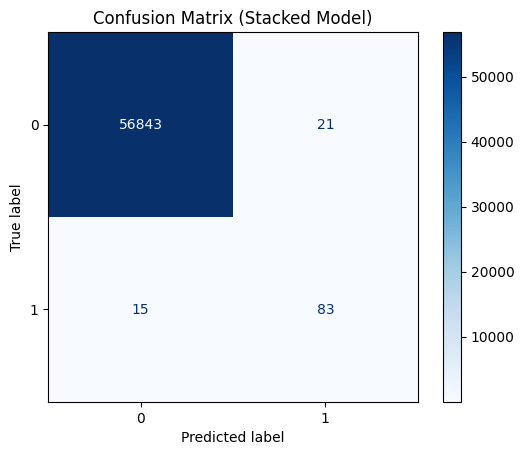

In [ ]:
# @title
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Your existing code
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, stacked_preds, cmap='Blues')
plt.title('Confusion Matrix (Stacked Model)')
plt.savefig('confusion_matrix_stacked.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

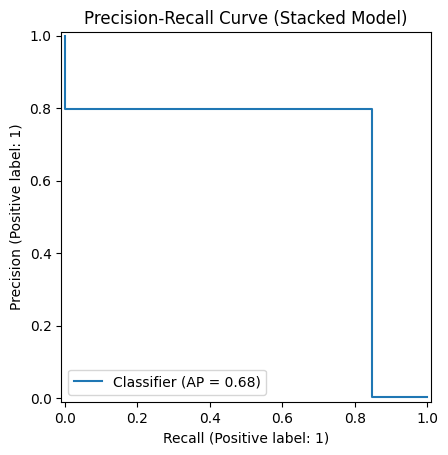

In [ ]:
# @title
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
PrecisionRecallDisplay.from_predictions(y_test, stacked_preds)
plt.title('Precision-Recall Curve (Stacked Model)')
plt.savefig('precision_recall_curve.png')
plt.show()


### Feature Importance Analysis  
1. **XGBoost**:  
   - Top Features: `V4`, `V14`, `V12`.  
   - Insight: Transaction amount (`Amount`) ranked lower, suggesting PCA components capture fraud patterns better.  

2. **Random Forest**:  
   - Top Features: `V17`, `V10`, `V3`.  
   - Insight: Temporal feature (`Time`) had negligible impact, aligning with EDA findings.  

3. **Consensus**: Both models agree on `V4` and `V14` as critical fraud indicators.  

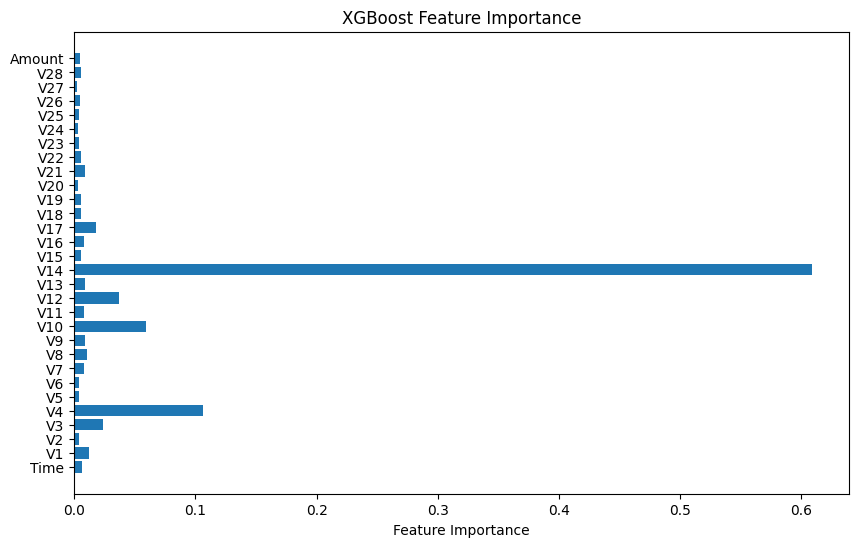

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# XGBoost feature importance
xgb_importance = xgb_clf.feature_importances_

# Plot XGBoost feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(xgb_importance)), xgb_importance, align='center')
plt.yticks(np.arange(len(xgb_importance)), X_train_resampled.columns)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


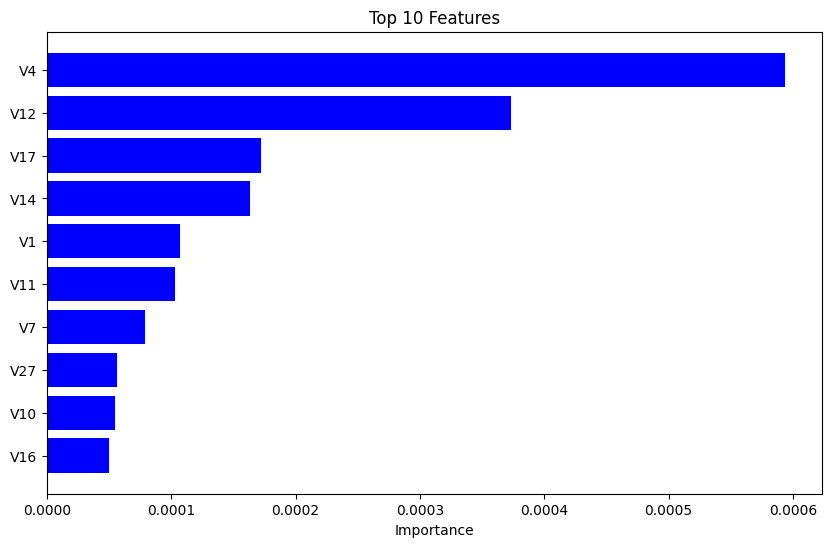

In [ ]:
# @title
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

# Random forest model and data
result = permutation_importance(rf_model_gpu, X, y, n_repeats=10, random_state=42, n_jobs=-1)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance = importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()
plt.show()



The chart ranks the features based on their impact on the random forest model's predictive accuracy. Higher values indicate greater importance.
V4 is the most important feature, suggesting it has the most significant influence on the model’s predictions. Conversely, V16 is the least important among the top 10 features.

###Limitations  
While XGBoost and Random Forest feature importances are included, permutation importance for the stacked model was omitted due to computational complexity and interpretability challenges. Future work could explore SHAP values or partial dependence plots for deeper insights.  

## Key Findings
- **Class Imbalance**: The dataset is highly imbalanced, making fraud detection challenging.  
- **Model Performance**: Ensemble methods (XGBoost, Stacked Model) outperformed simpler models like Logistic Regression.  
- **Feature Importance**: Features like `V14`, `V17`, and `V12` were the most important for fraud detection.  
- **Business Impact**: The stacked model can reduce fraud losses while minimizing false positives, improving customer trust.

## Next Steps
- **Collect More Data**: Additional fraud samples could improve model performance.  
- **Feature Engineering**: Create new features (e.g., transaction frequency, velocity) to capture fraud patterns.  
- **Deployment**: Test the stacked model in a real-time fraud detection system.  
- **Advanced Models**: Experiment with deep learning models or anomaly detection techniques.